# Twitter API v2

**Tutorial:** https://towardsdatascience.com/an-extensive-guide-to-collecting-tweets-from-twitter-api-v2-for-academic-research-using-python-3-518fcb71df2a


**Steps**

1. Introduction
2. Prerequisites to Start
3. Bearer Token
4. Create Headers
5. Create URL
	- search url
	- query params
6. Connect to Endpoint
7. Call the API endpoint
	- data
	- meta
8. Save Results to CSV
9. Looping Through Requests

> If we just send a request to collect tweets between the 1st of January 2020 and the 31st of December 2020, we will hit our cap very quickly without having a good distribution from all 12 months.
So what we can do is, we can set a limit for tweets we want to collect per month, so that if we reach the specific cap at one month, we move on to the next one.

* A For-loop that goes over the months/weeks/days we want to cover (Depending on how it is set)

* A While-loop that controls the maximum number of tweets we want to collect per time period.

* Notice that a time.sleep() is added between calls to ensure you are not just spamming the API with requests.

In [1]:
# 2. Prerequisites to Start

# For sending GET requests from the API
import requests
# For saving access tokens and for file management when creating and adding to the dataset
import os
# For dealing with json responses we receive from the API
import json
# For displaying the data after
import pandas as pd
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import datetime
import dateutil.parser
import unicodedata
#To add wait time between requests
import time

import yaml

## Tweets Count

In [7]:
# Bearer token
def auth():
    with open("../config.yaml") as file:
        passwords = yaml.safe_load(file)
    return passwords["search_tweets_api"]["bearer_token"]

bearer_token = auth()

search_url = "https://api.twitter.com/2/tweets/counts/all"

# Optional params: start_time, end_time, since_id, until_id, next_token, granularity
# Vizag gas leak -is:retweet
query_params = {'query': 'numerai',
                'granularity': 'day', 
                'start_time': '2019-01-01T00:00:00.000Z', 
                'end_time': '2019-02-23T00:00:00.000Z'
               }


def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2FullArchiveTweetCountsPython"
    return r


def connect_to_endpoint(url, params):
    response = requests.request("GET", search_url, auth=bearer_oauth, params=params)
    print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()


json_response = connect_to_endpoint(search_url, query_params)
res = json.dumps(json_response, indent=4, sort_keys=True)
print(res)

200
{
    "data": [
        {
            "end": "2019-01-24T00:00:00.000Z",
            "start": "2019-01-23T00:00:00.000Z",
            "tweet_count": 5
        },
        {
            "end": "2019-01-25T00:00:00.000Z",
            "start": "2019-01-24T00:00:00.000Z",
            "tweet_count": 12
        },
        {
            "end": "2019-01-26T00:00:00.000Z",
            "start": "2019-01-25T00:00:00.000Z",
            "tweet_count": 15
        },
        {
            "end": "2019-01-27T00:00:00.000Z",
            "start": "2019-01-26T00:00:00.000Z",
            "tweet_count": 4
        },
        {
            "end": "2019-01-28T00:00:00.000Z",
            "start": "2019-01-27T00:00:00.000Z",
            "tweet_count": 3
        },
        {
            "end": "2019-01-29T00:00:00.000Z",
            "start": "2019-01-28T00:00:00.000Z",
            "tweet_count": 5
        },
        {
            "end": "2019-01-30T00:00:00.000Z",
            "start": "2019-01-29T00:00:00.000

## Tweets Search

In [8]:
# 3. Bearer token
def auth():
    with open("../config.yaml") as file:
        passwords = yaml.safe_load(file)
    return passwords["search_tweets_api"]["bearer_token"]

In [9]:
# 4. Create Headers
def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers

In [10]:
# 5. Create url
def create_url(keyword, start_date, end_date, max_results = 10):
    
    search_url = "https://api.twitter.com/2/tweets/search/all" #Change to the endpoint you want to collect data from

    #change params based on the endpoint you are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'tweet.fields': 'id,text,author_id,created_at,public_metrics',
                    # 'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    # 'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    # 'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    # 'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}}
    return (search_url, query_params)

In [11]:
# 6. Connect to endpoint
def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [32]:
## // Inputs for the request //
bearer_token = auth()
headers = create_headers(bearer_token)

# keyword = "ethereum -is:retweet lang:en"
# keyword = "Vizag gas leak"
keyword = "(numerai OR $NMR OR NMRUSDT) -is:retweet -is:reply lang:en"

start_time = "2021-01-01T23:00:00.000Z"
end_time = "2021-01-02T00:00:00.000Z"
max_results = 10

In [33]:
## // Call the API //
url = create_url(keyword, start_time,end_time, max_results)
json_response = connect_to_endpoint(url[0], headers, url[1])
print(json.dumps(json_response, indent=4, sort_keys=True))

Endpoint Response Code: 200
{
    "data": [
        {
            "author_id": "1225037558456946689",
            "created_at": "2021-01-01T23:20:53.000Z",
            "id": "1345148016962002944",
            "public_metrics": {
                "like_count": 0,
                "quote_count": 0,
                "reply_count": 0,
                "retweet_count": 0
            },
            "text": "#NMRBTC $NMRBTC $NMR $BTC #bitcoin #trading #cryptotrading\n\n#Binance 2021-01-02 00:20:50\n\nSell Wall Detected\n\nPair:           #NMR/#BTC\nCurrent price:  0.00079200\nSell Wall Price: 0.00570000\nSell Wall Vol: 377.09 NMR\nSell Wall Vol: 2.15 BTC https://t.co/u8IY70KaTH"
        }
    ],
    "meta": {
        "newest_id": "1345148016962002944",
        "oldest_id": "1345148016962002944",
        "result_count": 1
    }
}


In [24]:
## Save Results
def append_to_csv(json_response, fileName):

    #A counter variable
    counter = 0

    #Open OR create the target CSV file
    csvFile = open(fileName, "a", newline="", encoding='utf-8')
    csvWriter = csv.writer(csvFile)

    #Loop through each tweet
    for tweet in json_response['data']:
        
        # We will create a variable for each since some of the keys might not exist for some tweets
        # So we will account for that

        # 1. Author ID
        author_id = tweet['author_id']

        # 2. Time created
        created_at = dateutil.parser.parse(tweet['created_at'])

        # 3. Tweet ID
        tweet_id = tweet['id']

        # 6. Tweet metrics
        retweet_count = tweet['public_metrics']['retweet_count']
        reply_count = tweet['public_metrics']['reply_count']
        like_count = tweet['public_metrics']['like_count']
        quote_count = tweet['public_metrics']['quote_count']

        # 8. Tweet text
        text = tweet['text']
        
        # Assemble all data in a list
        # 'author_id', 'created_at', 'tweet_id', 'text', 'like_count', 'quote_count', 'reply_count', 'retweet_count'
        res = [author_id, created_at, tweet_id, text, like_count, quote_count, reply_count, retweet_count]
        
        # Append the result to the CSV file
        csvWriter.writerow(res)
        counter += 1

    # When done, close the CSV file
    csvFile.close()

    # Print the number of tweets for this iteration
    print("# of Tweets added from this response: ", counter) 

In [9]:
# Create file
csvFile = open("vizag_gas_leak_twitter_api.csv", "a", newline="", encoding='utf-8')
csvWriter = csv.writer(csvFile)

#Create headers for the data you want to save, in this example, we only want save these columns in our dataset
csvWriter.writerow([ 'author_id', 'created_at', 'tweet_id', 'text', 'like_count', 'quote_count', 'reply_count', 'retweet_count'])
csvFile.close()

append_to_csv(json_response=json_response, fileName="vizag_gas_leak_twitter_api.csv")

# of Tweets added from this response:  48


In [14]:
## // Store collected tweets in a pickle file //

# import pandas as pd
# from pandas import json_normalize 
# df = json_normalize(json_response, 'data')
# display(df)
# print(df.columns)
# df.to_pickle('data/collected_tweets.pkl')
# df = pd.read_pickle('data/collected_tweets.pkl')

In [15]:
## // Store the data in Human readable format (collected_tweets.txt) // 
# but also store the data in a pickle dataframe ready to be processed using pandas.

# keys = json_response["data"][0].keys()
# print(keys)

# with open('../data/collected_tweets.txt', 'a') as outfile:
#     for i in range(len(json_response["data"])):
#         json.dump(json_response["data"][i], outfile)
#         outfile.write('\n')

# Pagination (Loops)

In [29]:
# [*range(1, 29)]

In [37]:
# date_list = []

# for year in [2020,2021]:
    
#     for month in range(1, 13):

#         if month==2:
#             for day in range(1, 29):
#                 for hour in range(0,24):
#                     month = str(month).zfill(2)
#                     day = str(day).zfill(2)
#                     hour = str(hour).zfill(2)
#                     date = f"{year}-{month}-{day}T{hour}:00:00.000Z"

#                     # print(date)
#                     date_list.append(date)

#         elif month in [4,6,9,11]:
#             for day in range(1, 31):
#                 for hour in range(0,24):
#                     month = str(month).zfill(2)
#                     day = str(day).zfill(2)
#                     hour = str(hour).zfill(2)
#                     date = f"{year}-{month}-{day}T{hour}:00:00.000Z"

#                     # print(date)
#                     date_list.append(date)

#         elif month in [1,3,5,7,8,10,12]:
#             for day in range(1, 32):
#                 for hour in range(0,24):
#                     month = str(month).zfill(2)
#                     day = str(day).zfill(2)
#                     hour = str(hour).zfill(2)
#                     date = f"{year}-{month}-{day}T{hour}:00:00.000Z"

#                     # print(date)
#                     date_list.append(date)

# print(f"Total timestamps: {len(date_list)}")

In [44]:
# date_list = []

# for year in [2020,2021]:
#     for month in range(1, 13):
#         month = str(month).zfill(2)
#         date = f"{year}-{month}-00T00:00:00.000Z"
#         # print(date)
#         date_list.append(date)

# print(f"Total timestamps: {len(date_list)}")

In [ ]:
## Create start_list and end_list

# start_list = date_list
# end_list = date_list[1:]


In [45]:
# start_list =    ['2020-05-07T00:00:00.000Z',
#                  '2020-05-08T00:00:00.000Z',
#                  '2020-05-09T00:00:00.000Z',
#                  '2020-05-10T00:00:00.000Z',
#                  '2020-05-11T00:00:00.000Z',
#                  '2020-05-12T00:00:00.000Z']

# end_list =      ['2020-05-08T00:00:00.000Z',
#                  '2020-05-09T00:00:00.000Z',
#                  '2020-05-10T00:00:00.000Z',
#                  '2020-05-11T00:00:00.000Z',
#                  '2020-05-12T00:00:00.000Z',
#                  '2020-05-13T00:00:00.000Z']

In [54]:
start_list = ['2020-01-01T00:00:00.000Z']
end_list = ['2021-08-31T00:00:00.000Z']

In [55]:
## Sanity check
pd.DataFrame(data = {"start":start_list[:20],
                    "end":end_list[:20]})

,start,end
0,2020-01-01T00:00:00.000Z,2021-08-31T00:00:00.000Z


In [56]:
print("starting timestamp:", start_list[0])
print("ending timestamp:", start_list[-1])

starting timestamp: 2020-01-01T00:00:00.000Z
ending timestamp: 2020-01-01T00:00:00.000Z


In [57]:
#Inputs for tweets
bearer_token = auth()
headers = create_headers(bearer_token)
keyword = "(numerai OR $NMR OR NMRUSDT) -is:retweet -is:reply lang:en"
datafile = "../data/numerai_twitter_api.csv"

max_results = 500 # total results per API call


#Total number of tweets we collected from the loop
total_tweets = 0

# Create file
csvFile = open(datafile, "a", newline="", encoding='utf-8')
csvWriter = csv.writer(csvFile)

# (Only the first time)
# Create headers for the data you want to save, in this example, we only want save these columns in our dataset
csvWriter.writerow(['author_id', 'created_at', 'tweet_id', 'text',
                    'like_count', 'quote_count', 'reply_count', 'retweet_count'])

csvFile.close()

for i in range(0,len(start_list)):

    # Inputs
    count = 0 # Counting tweets per time period
    max_count = 2_000_000 # Max tweets per time period
    flag = True
    next_token = None
    
    # Check if flag is true
    while flag:
        
        # Check if max_count reached
        if count >= max_count:
            break
        print("-------------------")
        print("Token: ", next_token)
        url = create_url(keyword, start_list[i],end_list[i], max_results)
        json_response = connect_to_endpoint(url[0], headers, url[1], next_token)
        result_count = json_response['meta']['result_count']

        if 'next_token' in json_response['meta']:
            # Save the token to use for next call
            next_token = json_response['meta']['next_token']
            print("Next Token: ", next_token)
            if result_count is not None and result_count > 0 and next_token is not None:
                print("Start Date: ", start_list[i])
                append_to_csv(json_response, datafile)
                count += result_count
                total_tweets += result_count
                print("Total # of Tweets added: ", total_tweets)
                print("-------------------")
                time.sleep(5)                
        
        # If no next token exists
        else:
            if result_count is not None and result_count > 0:
                print("-------------------")
                print("Start Date: ", start_list[i])
                append_to_csv(json_response, datafile)
                count += result_count
                total_tweets += result_count
                print("Total # of Tweets added: ", total_tweets)
                print("-------------------")
                time.sleep(5)
            
            #Since this is the final request, turn flag to false to move to the next time period.
            flag = False
            next_token = None
        
        time.sleep(2)
        
print("Total number of results: ", total_tweets)

-------------------
Token:  None
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fpdm9u5d4w1huk6cu6jd107b344oe5
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  495
Total # of Tweets added:  495
-------------------
-------------------
Token:  b26v89c19zqg8o3fpdm9u5d4w1huk6cu6jd107b344oe5
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fpdm85adv7p6fbsfe86wq81drldim5
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  493
Total # of Tweets added:  988
-------------------
-------------------
Token:  b26v89c19zqg8o3fpdm85adv7p6fbsfe86wq81drldim5
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fpdm6gwhlf2pbpexbfq84e868s8ku5
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  499
Total # of Tweets added:  1487
-------------------
-------------------
Token:  b26v89c19zqg8o3fpdm6gwhlf2pbpexbfq84e868s8ku5
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fpdj97tvi3vk41iuzamw23vs587ou5
Sta

Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3foshtd7tm4hk4p8648rmtsd07dlhfh
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  428
Total # of Tweets added:  14152
-------------------
-------------------
Token:  b26v89c19zqg8o3foshtd7tm4hk4p8648rmtsd07dlhfh
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosevpkwu7ie5xj3od877wk0yrohod
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  420
Total # of Tweets added:  14572
-------------------
-------------------
Token:  b26v89c19zqg8o3fosevpkwu7ie5xj3od877wk0yrohod
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3foseufn23ccope3o5jkghpa7q8lwu5
Start Date:  2020-01-01T00:00:00.000Z
# of Tweets added from this response:  473
Total # of Tweets added:  15045
-------------------
-------------------
Token:  b26v89c19zqg8o3foseufn23ccope3o5jkghpa7q8lwu5
Endpoint Response Code: 200
Next Token:  b26v89c19zqg8o3fosesrjq63tslqeatxjn00pgaxds3h
Start Date:  2020-01-01T00:00:0

# EDA collected dataset

In [73]:
import numpy as np
import pandas as pd

In [74]:
print("Dataset:", datafile)
df = pd.read_csv(datafile)

Dataset: ../data/numerai_twitter_api.csv


In [75]:
df.shape

(24808, 8)

In [76]:
df.head()

,author_id,created_at,tweet_id,text,like_count,quote_count,reply_count,retweet_count
0,1141208687001780225,2021-08-30 23:46:47+00:00,1432490010046078977,$NMR\n🔻 Decreased 4.34% in 9.8 hour(s)\n💵 Pric...,0,0,0,0
1,1150271775273619456,2021-08-30 23:41:40+00:00,1432488721979527169,$BNT $CRV $NMR $OGN $REP $REQ $CVC $MLN keep a...,3,0,1,0
2,23025079,2021-08-30 23:21:26+00:00,1432483630341820421,$coti added some 33s 💁‍♂️🙈\n$btc $eth $mkr $aa...,4,1,14,1
3,1329640297760911361,2021-08-30 23:09:30+00:00,1432480627274629130,NO MONSTER NO GAIN!\n\nMarket analysis &amp; r...,0,0,0,0
4,2896209087,2021-08-30 22:52:57+00:00,1432476464742608906,$NMR decision time is coming soon. I see two p...,3,0,1,0


In [78]:
total_tweets = len(df)
unique_authors = df["author_id"].nunique()
print(f'There are {unique_authors} unique authors for {total_tweets} total tweets ({np.round(unique_authors/total_tweets,2)}).')

There are 2953 unique authors for 24808 total tweets (0.12).


## WordCloud

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(13,6)})
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [88]:
# WordCloud?

In [89]:
# Concatanate tweets on a single string
text = " ".join(txt for txt in df["text"])
total_words = len(text)
print (f"There are {total_words} words in the combination of all tweets.")

# Lower case the words
text = text.lower()

unique_words = set(text)
total_unique_words = len(unique_words)
print (f"The unique words are {total_unique_words}")

There are 4918284 words in the combination of all tweets.
The unique words are 665


In [90]:
text[:10_000]

"$nmr\n🔻 decreased 4.34% in 9.8 hour(s)\n💵 price - 42.81000000 usdt\n⏱️ [30 aug] - 23:46:47 utc\n#nmr #nmrusdt #cryptobot $bnt $crv $nmr $ogn $rep $req $cvc $mln keep an eye out for these coins exploding soon as i have a feeling 🙏🏽 $coti added some 33s 💁\u200d♂️🙈\n$btc $eth $mkr $aave $comp $uni $link $xrp $doge $icp $ect $snx $sol $mln $qnt $farm $yfi $forth $storj $fil $mana $enj $ogn $bal $nmr $fet $ach $amp $ankr $zrx $req $iotx $nu $lrc $ren $grt $matic $crv $luna $wluna $crv $dnt $cvc $uma $rep $quick https://t.co/nkrlhxlny2 no monster no gain!\n\nmarket analysis &amp; recaps, scalping leverage calls, binance altcoin signals and real time news.\n\nfree join : https://t.co/hp22zvjnm6\n\n$arpa $adx $akro $cos $kmd $bqx $beam $perl $dock $iris $renbtc $chr $paxg $wabi $ong $nano $xvg $doge $nkn $chz $mtl $nmr $nmr decision time is coming soon. i see two possible directions: either it pumps to 50+ within the week or it breaks this trendline and dumps to support. https://t.co/dmffnn1i

In [85]:
unique_words

{'\n',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '=',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\xa0',
 '£',
 '«',
 '®',
 '²',
 '´',
 '·',
 '»',
 'ç',
 'è',
 'é',
 'í',
 'ö',
 'ø',
 'ü',
 'đ',
 'ı',
 'ł',
 'ş',
 'ƀ',
 'ɇ',
 'ˆ',
 'δ',
 'μ',
 'ا',
 'ة',
 'ت',
 'ح',
 'د',
 'ر',
 'ز',
 'س',
 'ش',
 'ص',
 'ض',
 'غ',
 'ف',
 'ق',
 'ل',
 'م',
 'ن',
 'ه',
 'و',
 'ي',
 '฿',
 '\u200a',
 '\u200b',
 '\u200d',
 '–',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '•',
 '…',
 '‼',
 '‽',
 '⁉',
 '\u2060',
 '\u2066',
 '\u2069',
 '₣',
 '₦',
 '€',
 '₮',
 '₳',
 '₵',
 '₿',
 '⃣',
 '™',
 'ℹ',
 '←',
 '↑',
 '↓',
 '↗',
 '↘',
 '⇝',
 '∆',
 '−',
 '√',
 '≈',
 '⋄',
 '⋅',
 '⋆',
 '⌛',
 '⏩',
 '⏰',
 '⏱',
 '⏲',
 '⏳',
 '①',
 '②',

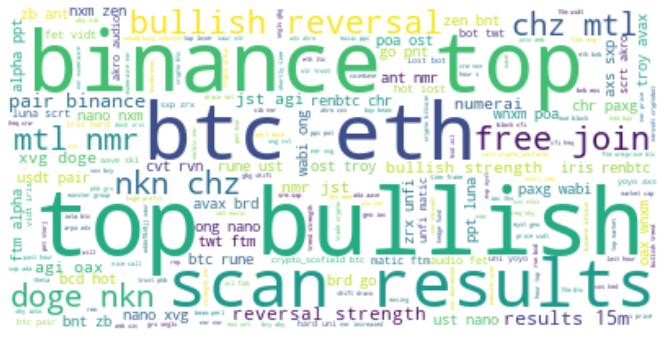

In [83]:
# Create stopword list and update it with other common words
stopwords = set(STOPWORDS)
stopwords.update(["amp", "https", "t", "co", "t co",
                  "https t"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [84]:
# Most common words
wordcloud.words_

{'top bullish': 1.0,
 'binance top': 0.808130081300813,
 'btc eth': 0.7551684088269454,
 'scan results': 0.5031358885017422,
 'bullish reversal': 0.4994192799070848,
 'free join': 0.4882694541231127,
 'mtl nmr': 0.4367015098722416,
 'doge nkn': 0.43159117305458766,
 'nkn chz': 0.4313588850174216,
 'chz mtl': 0.4313588850174216,
 'pair binance': 0.40720092915214867,
 'results 15m': 0.40487804878048783,
 'reversal strength': 0.40371660859465736,
 'bullish strength': 0.3716608594657375,
 'xvg doge': 0.3619047619047619,
 'nmr jst': 0.3588850174216028,
 'jst agi': 0.35609756097560974,
 'agi oax': 0.35609756097560974,
 'numerai': 0.33240418118466897,
 'axs sxp': 0.2980255516840883,
 'chr paxg': 0.29523809523809524,
 'nano xvg': 0.29523809523809524,
 'iris renbtc': 0.29454123112659697,
 'renbtc chr': 0.29454123112659697,
 'paxg wabi': 0.29454123112659697,
 'wabi ong': 0.29454123112659697,
 'ong nano': 0.29454123112659697,
 'ant nmr': 0.2929152148664344,
 'usdt pair': 0.2926829268292683,
 'run